# Regresión lineal simple

La regresión lineal es un enfoque para modelar la relación entre una variable dependiente y otra independiente.
Las regresiones nos permiten predecir resultados en base a una experiencia obtenida previamente (datos obtenidos con anterioridad)

En una regresión lineal asumimos que $f$ es una función lineal de $x$:

$$
f(x) = \beta \cdot x + \alpha + \epsilon \\
\beta : \text{pendiente} \\ 
\alpha : \text{termino independiente} \\
\epsilon : \text{errores cometidos} \\
$$

En el caso de $\epsilon$ será una variable aleatoria con distribución normal, el cual expresará el error o residuo. Si el residuo no se expresa como una distribución normal, es que el modelo no es lineal, y por tanto el punto de partida es erróneo.

## Modelo con datos simulados

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

# specified libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# seaborn style
sns.set()

# seed
np.random.seed(42)

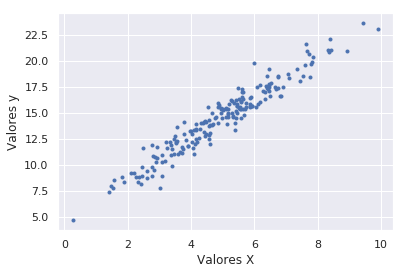

In [2]:
# datos sintéticos
X = 5 + 1.8 * np.random.randn(200)
res = 0.9 * np.random.randn(200)
y_obs = 5 + 1.9 * X + res

# visualizamos
plt.plot(X ,y_obs, marker='.', linestyle='none')
plt.xlabel("Valores X")
plt.ylabel("Valores y")
plt.show()

Aplicamos el algoritmo procedente de *sckit-learn*. Previamente habrá que transponer los vectores.

Transposición:

$$
x = (a_1, a_2, ..., a_i) \longrightarrow
x=\begin{pmatrix}
a_1\\
a_2\\
...\\
a_i
\end{pmatrix}
$$

In [3]:
# Reshape the data
X = np.reshape(a=X, newshape=(-1, 1))
y_obs = np.reshape(a=y_obs, newshape=(-1, 1))

In [4]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X, y_obs)
print("R2: ", regressor.score(X, y_obs))

R2:  0.9317999193215936


### Scikit-learn
#### Regresión lineal

La clase que inicia la instancia para poder usar los distintos métodos es la siguiente:

```python
LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```

Una vez instanciada podemos usar los métodos que están descritos más abajo.

|        Método               | Descripción     |
|-----------------------------|-----------------|
|`fit(X, y[, sample_weight])`   | Fit linear model|
|`get_params([deep])`           | Get parameters for this estimator |
|`predict(X)`                   | Predict using the linear model |
|`score(X, y[, sample_weight])` | Returns the coefficient of determination R^2 of the prediction |
|`set_params(**params)`         | Set the parameters of this estimator|



In [5]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X, y_obs)

# Predicting the Test set results
y_pred = regressor.predict(X)

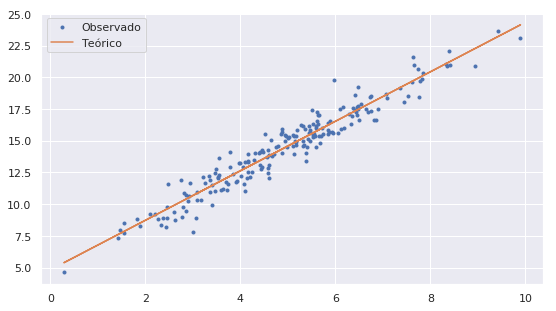

In [6]:
# Visualising the Training set results
plt.figure(figsize=(9,5))
plt.plot(X, y_obs, marker='.', linestyle='none', label='Observado')
plt.plot(X, y_pred, label='Teórico')
plt.legend()
plt.show()

Aunque los datos son sintéticos y sabemos que los errores siguen una distribución normal, en un caso real, llegados a este punto tendremos que analizar los errores obtenidos.

## Medición de la calidad del modelo

Queremos saber el nivel de calidad de nuestro modelo, para ello calculamos los errores cometidos. Tenemos tres tipos de errores:

* Cuadrado de la suma de los residuos

In [7]:
# Libraries
from sklearn import metrics

In [8]:
metrics.mean_squared_error(y_obs, y_pred)

0.7780298041476967

In [9]:
metrics.mean_absolute_error(y_obs, y_pred)

0.6992806540328367

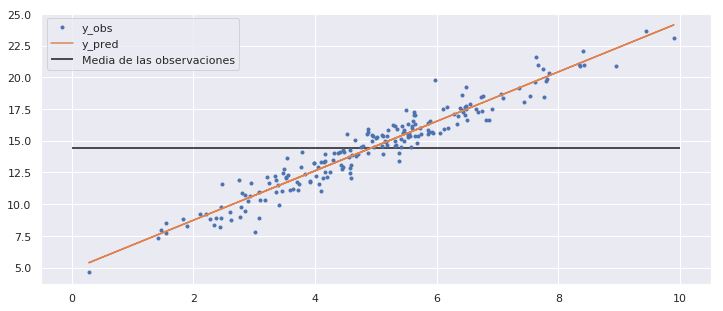

In [10]:
plt.figure(figsize=(12,5))
plt.plot(X, y_obs, marker='.', linestyle='none', label='y_obs')
plt.hlines(y=np.mean(y_obs), xmin=0, xmax=10, label="Media de las observaciones")
plt.plot(X, y_pred, label='y_pred')
plt.legend()
plt.show()

In [11]:
# Suma al cuadrado de los residuos respecto a la media
ssr = np.sum((y_pred - np.mean(y_obs)) ** 2)
ssr

2126.0036689785297

In [12]:
# Suma de las desviaciones
ssd = np.sum(y_pred - y_obs)
ssd

6.483702463810914e-13

In [13]:
# SST
sst = (y_obs - np.mean(y_obs)) ** 2 
sst.sum()

2281.60962980807

In [14]:
# coeficiente r2
ssr.sum() / sst.sum()

0.9317999193215931

In [15]:
ssd.sum()

6.483702463810914e-13

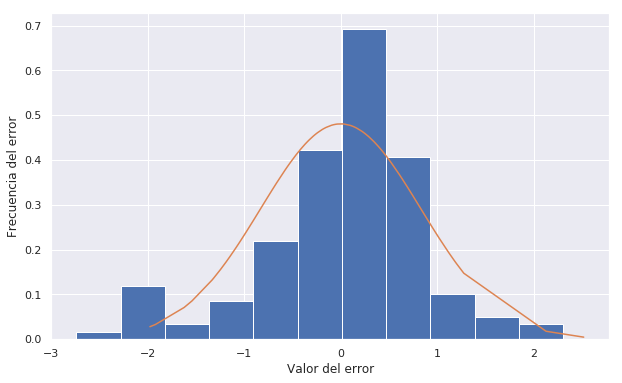

In [31]:
# ssd normal teórico
mean = np.mean(ssd)
std = np.std(ssd)

# distribución de datos teóricos
ssd_th = np.sort(mean + std * np.random.randn(100))
freq_th = ss.norm.pdf(x=ssd_th, loc=mean, scale=std)

# Distribución de los errores que el modelo no es capaz de explicar
plt.figure(figsize=(10,6))
plt.hist(ssd, bins=int(np.sqrt(ssd.size)), density=True)
plt.plot(ssd_th, freq_th)
plt.xlabel("Valor del error")
plt.ylabel("Frecuencia del error")
plt.show()

### Múltiples variables

Si nuestro modelo contiene múltiples variables nos enfrentaremos a la decisión de que variables usar. Normalmente dependiendo del contexto será intuitivo usar unas variables frente a otras, pero esto no siempre puede ser así. A la vez, al tener múltiples variables, podemos tener coeficientes más grandes que otros, lo que hará que el modelo quede distorsionado por estas variables, reduciendo el impacto de las demás.

Aquí vamos a ver dos tipos diferentes de regresiones que nos ayudarán con estos dos problemas:

* Regresión Ridge
* Regresión Lasso

#### Regresión Ridge

$$
\text{Loss function} = \text{OLS loss function} + \alpha \cdot \sigma_{i = 1}^{n} \alpha_{i}^{2}
$$

El parámetro $\alpha$ lo tenemos que determinar nosotros, o elegir según conveniencia.

#### Regresión Lasso

Este tipo de regresiones nos permite seleccionar características importantes de nuestro conjunto de datos.

In [39]:
# Datos
# datos sintéticos anteriores
x1 = 5 + 1.8 * np.random.randn(200)
res = 0.9 * np.random.randn(200)
#y_obs = 5 + 1.9 * X + res

# nuevas variables
x2 = 3 + 1.2 * np.random.randn(200)
x3 = 4.3 + 0.5 * np.random.randn(200)
x4 = 2.2 + 3.203 * np.random.randn(200)

# variable target
y_obs = 1.4 + 1.01 * x1 + 3.4 * x2 + 13.3 * x3 + 0.45 * x4 + res

In [44]:
names = ["x1", "x2", "x3", "x4"]
X = np.stack([x1,x2,x3,x4], axis=1)
X.shape

(200, 4)

In [33]:
from sklearn.linear_model import Lasso

In [49]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y_obs).coef_

In [50]:
lasso_coef

array([ 0.97660662,  3.26531848, 12.92671722,  0.4593771 ])

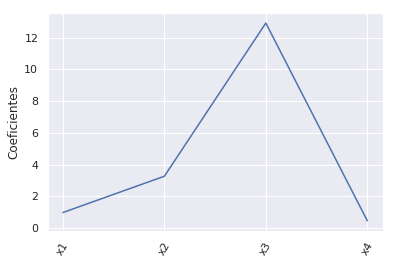

In [52]:
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel("Coeficientes")
plt.show()

## Modelo real

Vamos a utilizar el conjunto de datos de 'Fertilidad de la mujer' para realizar una regresión lineal

In [17]:
fertility = pd.read_csv('../data/female_literacy_fertility.csv')
fertility.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


In [18]:
# Añadimos la columna de analfabetismo
fertility['illiteracy'] = 100 - fertility['female literacy']

In [19]:
# extracción de datos
y = fertility['fertility'].values
X = fertility['illiteracy'].values

In [20]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# shape
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((129,), (33,), (129,), (33,))

In [21]:
# Reshape
X_train = np.reshape(a=X_train, newshape=(-1,1))
y_train = np.reshape(a=y_train, newshape=(-1,1))
X_test = np.reshape(a=X_test, newshape=(-1,1))
y_test = np.reshape(a=y_test, newshape=(-1,1))

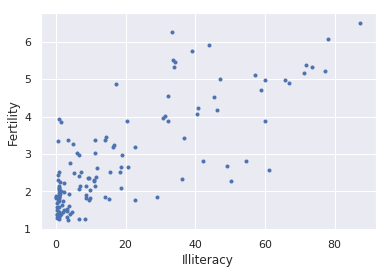

In [22]:
# visualizamos
plt.plot(X_train,y_train, marker='.', linestyle='none')
plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.show()

In [23]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

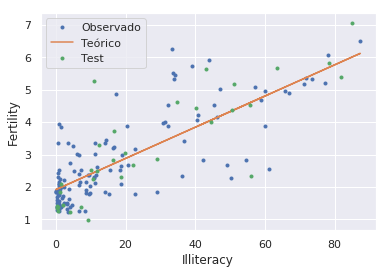

In [24]:
# Visualising the Training set results
plt.plot(X_train, y_train, marker='.', linestyle='none', label='Observado')
plt.plot(X_train, regressor.predict(X_train), label='Teórico')
plt.plot(X_test, y_test, marker='.', linestyle='none', label='Test')
plt.legend()
plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.show()

In [25]:
# Parámetros
r2 = regressor.score(X_train, y_train)

print("coeficiente de pearson: ", r2)

coeficiente de pearson:  0.6176893036432216


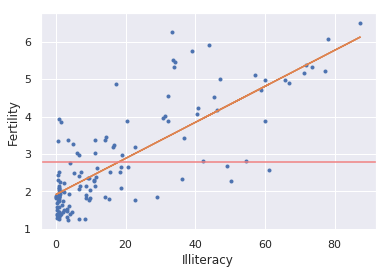

In [26]:
plt.plot(X_train, y_train, marker='.', linestyle='none')
plt.plot(X_train, regressor.predict(X_train))
plt.axhline(y=np.mean(y_train), color='lightcoral')
plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.show()

Vamos a calcular el coeficiente $r^2$ a mano, y posteriormente vamos a realizar una gráfica de los errores cometidos.

* SST = SSD + SSR
* SST (sum squared total): Variabilidad de los datos con respecto de su media
* SSD (sum squared differences) : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR (sum squared residuals): Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [27]:
# valores en color verde (teóricos)
y_pred = regressor.predict(X_train)

# cálculo de los distintos errores

# SSR
ssr = (y_pred - np.mean(y_train)) ** 2
# SSD
ssd = (y_pred - y_train) ** 2
# SST
sst = (y_train - np.mean(y_train)) ** 2 

# coeficiente r2
ssr.sum() / sst.sum()

0.6176893036432216

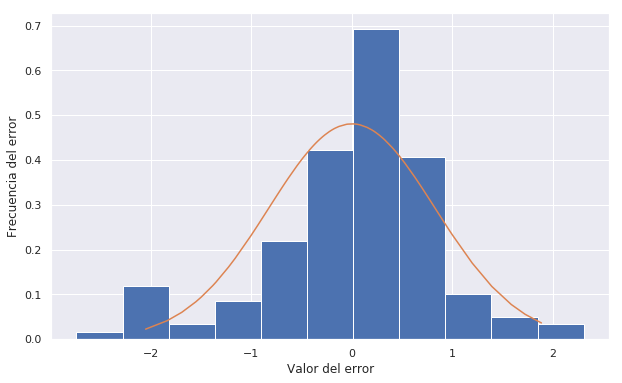

In [28]:
# ssd
ssd = (y_pred - y_train)

# ssd normal teórico
mean = np.mean(ssd)
std = np.std(ssd)

# distribución de datos teóricos
ssd_th = np.sort(mean + std * np.random.randn(100))
freq_th = ss.norm.pdf(x=ssd_th, loc=mean, scale=std)

# Distribución de los errores que el modelo no es capaz de explicar

plt.figure(figsize=(10,6))
plt.hist(ssd, bins=int(np.sqrt(len(ssd))), density=True)
plt.plot(ssd_th, freq_th)
plt.xlabel("Valor del error")
plt.ylabel("Frecuencia del error")
plt.show()

In [29]:
## 

El resultado que obtenemos está alejado de los valores teóricos. Esto ya lo sabíamos debido a que el coeficiente $r^2$ nos ha salido $0.6$, por tanto no hay una correlación perfecta, sino que existen errores que desvían nuestro modelo.

## Interpretando los parámetros de la regresión

El modelo presenta una relación lineal. Pero vamos a comprobar la existencia de dicha relación planteando el contraste de hipótesis siguiente:

$$
\begin{equation}
    \begin{cases}
      H_{0} &  \beta = 0 \\
      H_{1} &  \beta \neq 0
    \end{cases}
  \end{equation}
$$

Si existe suficiente correlación, la covarianza sería positiva, y $\beta$ no sería cero ni estaría cerca de cero.

Podemos calcular un *t-estadístico* o un *p-valor*. Si el *p-valor* resultante es menor que el nivel de significación, rechazamos la hipótesis nula y aceptamos que existe una relación lineal entre x e y.

In [30]:
# variables
illiteracy = fertility['illiteracy'].values
fertility = fertility['fertility'].values

# calculamos el coeficiente de correlación
r_obs = np.corrcoef(illiteracy, fertility)[0][1]

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(illiteracy_permuted, fertility)[0][1]

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


### El error estándar residual

RSE es la desviación estándar del término del error. Desviación de la parte de datos que el modelo no es capaz de explicar por falta de información o más datos adicionales.

* En el caso de una regresión lineal simple:

$$
RSE = \sqrt{\frac{\Sigma (y_{i} - y(x_{i}))^2}{n - 2}} = \sqrt{\frac{SSD}{n - 2}}
$$

* En el caso de una regresión lineal múltiple:

$$
RSE = \sqrt{\frac{SSD}{n - k - 2}}
$$